<a href="https://colab.research.google.com/github/Robert202132437/snowy-pig/blob/main/Fangyue_Fu_202132437_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

Fangyue Fu(202132437)

candidate number: 26049

In [ ]:
# importing necessary modules
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.layers import BatchNormalization

# layers used in this example
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Embedding, LSTM

# **P1-convolutional neural networks**

In [ ]:
# imoport datasets
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
data_train = data_train.astype('float32')
data_test = data_test.astype('float32')
X_train = data_train / 255.0
X_test = data_test / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(label_train)
y_test = np_utils.to_categorical(label_test)

In [ ]:
y_train.shape

(50000, 10)

## **P1.1**

In [ ]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, input_shape=(32,32,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1000),
    Dense(10, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 4, 4, 32)        

## **P1.2**

In [ ]:
## model compile, set top-3 and top-5 accuracy metrics
model1.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01), 
               metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')])

In [ ]:
history1 = model1.fit(
    X_train,
    y_train,
    epochs=100, 
    verbose=0,
    validation_split=0.25,
    shuffle=True, # randomly shuffle the whole training dataset
    batch_size=128,
    steps_per_epoch=50) # only iterate first 50 mini-batches

Draw the plot of training and validation loss versus the number of epochs

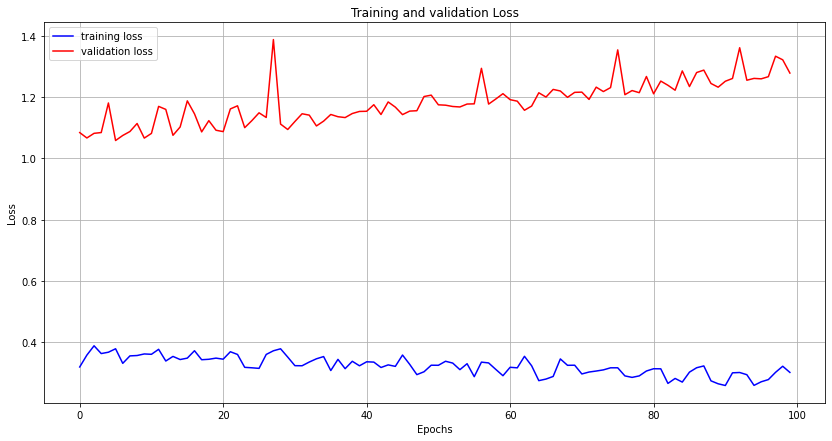

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and validation Loss')
plt.plot(history1.history['loss'], color='blue', label='training loss')
plt.plot(history1.history['val_loss'], color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Draw the plot of training and validation top-3 and top-5 accuracy versus the number of epochs

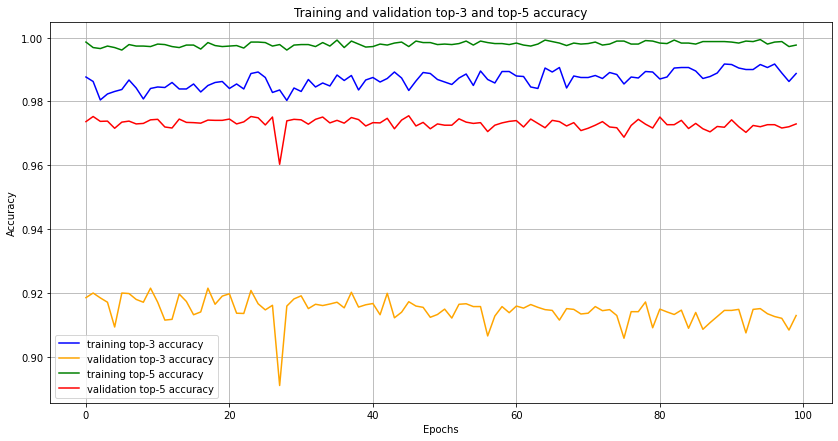

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and validation top-3 and top-5 accuracy')
plt.plot(history1.history['top3_accuracy'], color='blue', label='training top-3 accuracy')
plt.plot(history1.history['val_top3_accuracy'], color='orange', label='validation top-3 accuracy')
plt.plot(history1.history['top5_accuracy'], color='green', label='training top-5 accuracy')
plt.plot(history1.history['val_top5_accuracy'], color='red', label='validation top-5 accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.4935 - accuracy: 0.6576 - top3_accuracy: 0.8981 - top5_accuracy: 0.9684


[1.4934937953948975,
 0.6575999855995178,
 0.8981000185012817,
 0.9684000015258789]

The training loss decreases with the epochs increasing, but the validation loss is big and not consistent with the training set.

The traning top-3 and top-5 accuracy are more accurate than the validation set.

In conclusion, This model (without the Dropout layer) is overfitting.

## **P1.3**

In [ ]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, input_shape=(32,32,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1000),
    Dropout(0.4), ## add a dropout layer
    Dense(10, activation='softmax')
])
model2.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01), 
               metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')])

In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 4, 4, 32)       

In [ ]:
history2 = model2.fit(
    X_train,
    y_train,
    epochs=100, 
    verbose=0,
    validation_split=0.25,
    shuffle=True, # randomly shuffle the whole training dataset
    batch_size=128,
    steps_per_epoch=50) # only iterate first 50 mini-batches

Draw the plot of training and validation loss versus the number of epochs

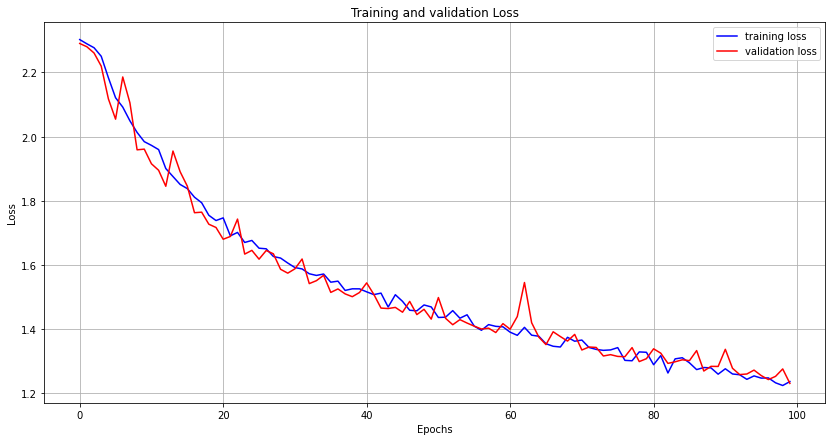

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and validation Loss')
plt.plot(history2.history['loss'], color='blue', label='training loss')
plt.plot(history2.history['val_loss'], color='red', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Draw the plot of training and validation top-3 and top-5 accuracy versus the number of epochs

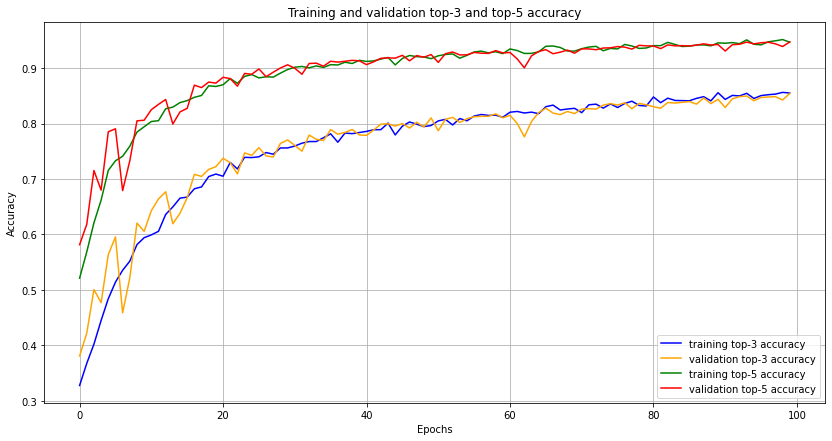

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and validation top-3 and top-5 accuracy')
plt.plot(history2.history['top3_accuracy'], color='blue', label='training top-3 accuracy')
plt.plot(history2.history['val_top3_accuracy'], color='orange', label='validation top-3 accuracy')
plt.plot(history2.history['top5_accuracy'], color='green', label='training top-5 accuracy')
plt.plot(history2.history['val_top5_accuracy'], color='red', label='validation top-5 accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2174 - accuracy: 0.5658 - top3_accuracy: 0.8594 - top5_accuracy: 0.9510


[1.217354416847229, 0.5658000111579895, 0.8593999743461609, 0.9509999752044678]

The loss obviously decreases and the accuracy obviously increases with the number of epochs increasing in both traning and validation sets.

Compared with the results in P1.2, model 2 (with Dropout layer) has better behaviours in the validation set and is consistent with the traning set.

In conclusion, model 2 reduces the overfitting but get higer loss than model 1 due to the simplification.

## **P1.4**

### **First method:** using two (3×3) VGG blocks to replace (5×5) kernel size

I repeat twice with 32 feature map. The effect be an increasing number of feature maps with a smaller and smaller size given the max pooling layers. It is an attempt to better translate the large number feature maps to class values.

In [ ]:
model3 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=1, input_shape=(32,32,3), padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1000), 
    Dense(10, activation='softmax')
])
model3.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01), 
               metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')])

In [ ]:
history3 = model3.fit(
    X_train,
    y_train,
    epochs=100, 
    verbose=0,
    validation_data=(X_test,y_test),
    shuffle=True, # randomly shuffle the whole training dataset
    batch_size=128,
    steps_per_epoch=50) # only iterate first 50 mini-batches

Plot the loss function of training and test sets

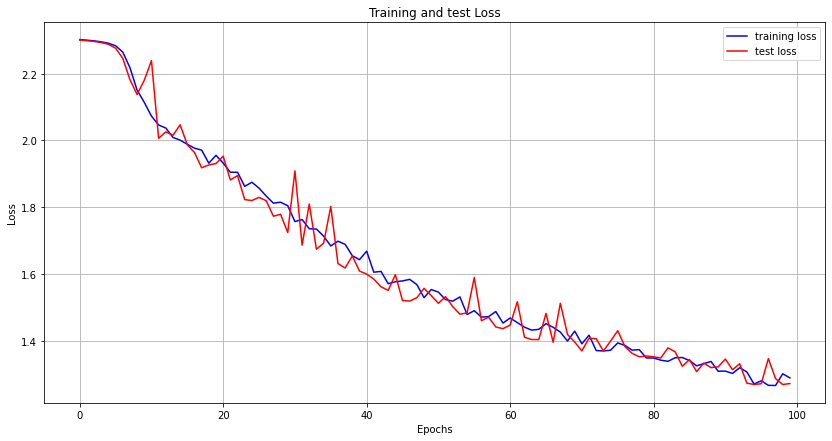

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and test Loss')
plt.plot(history3.history['loss'], color='blue', label='training loss')
plt.plot(history3.history['val_loss'], color='red', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Plot the accuracy of training and test sets

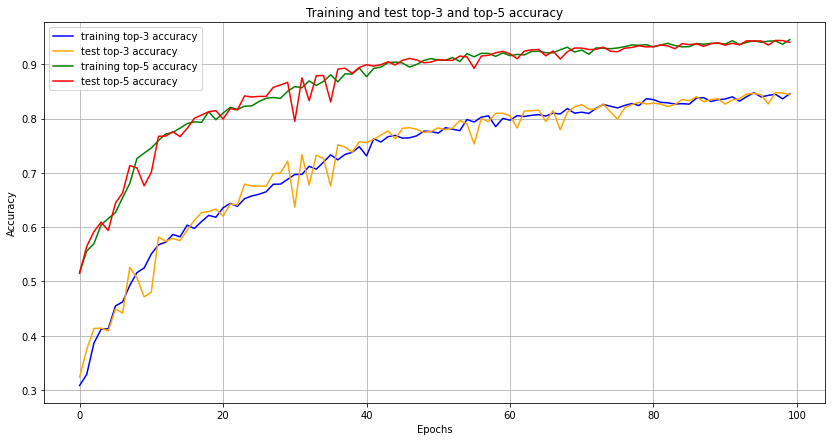

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and test top-3 and top-5 accuracy')
plt.plot(history3.history['top3_accuracy'], color='blue', label='training top-3 accuracy')
plt.plot(history3.history['val_top3_accuracy'], color='orange', label='test top-3 accuracy')
plt.plot(history3.history['top5_accuracy'], color='green', label='training top-5 accuracy')
plt.plot(history3.history['val_top5_accuracy'], color='red', label='test top-5 accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
model3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.2718 - accuracy: 0.5494 - top3_accuracy: 0.8441 - top5_accuracy: 0.9403


[1.2718241214752197,
 0.5493999719619751,
 0.8440999984741211,
 0.9402999877929688]

We get more accurate result as P1.1 and reduce the overfitting.

### **Second method:** Increase the number of epochs

In [ ]:
history4 = model1.fit(
    X_train,
    y_train,
    epochs=500, # increase the epochs to 500
    verbose=0,
    validation_data=(X_test,y_test),
    shuffle=True, # randomly shuffle the whole training dataset
    batch_size=128,
    steps_per_epoch=50) # only iterate first 50 mini-batches

Plot the loss function of training and test sets

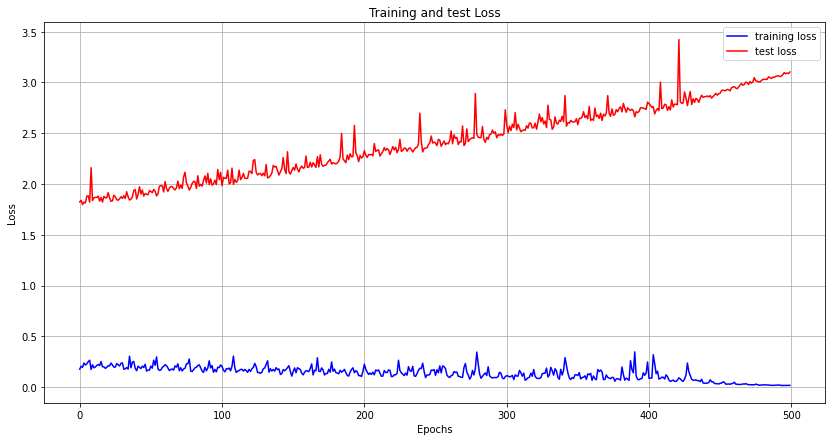

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and test Loss')
plt.plot(history4.history['loss'], color='blue', label='training loss')
plt.plot(history4.history['val_loss'], color='red', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Plot the accuracy of training and test sets

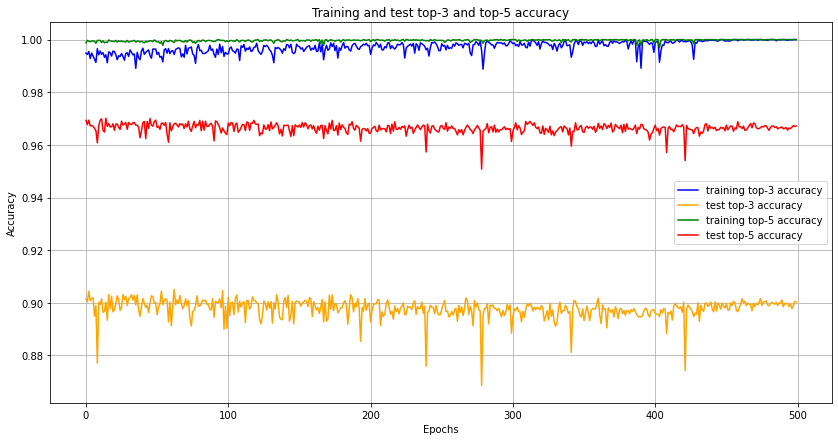

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and test top-3 and top-5 accuracy')
plt.plot(history4.history['top3_accuracy'], color='blue', label='training top-3 accuracy')
plt.plot(history4.history['val_top3_accuracy'], color='orange', label='test top-3 accuracy')
plt.plot(history4.history['top5_accuracy'], color='green', label='training top-5 accuracy')
plt.plot(history4.history['val_top5_accuracy'], color='red', label='test top-5 accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

With the number of epochs increassing, we have more training rounds and get more accurate result as expected. But the model is also overfitting. 

### **Third method:** add batch normalization

Batch normalization is used to automatically standardize the inputs.
It has the effect of dramatically accelerating the training process of a neural network, and in some cases improves the performance of the model via a modest regularization effect.

In [ ]:
model5 = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, input_shape=(32,32,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(1000),
    Dense(10, activation='softmax')
])
model5.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01), 
               metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')])

In [ ]:
history5 = model5.fit(
    X_train,
    y_train,
    epochs=100, 
    verbose=0,
    validation_data=(X_test,y_test),
    shuffle=True, # randomly shuffle the whole training dataset
    batch_size=128,
    steps_per_epoch=50) # only iterate first 50 mini-batches

Plot the loss function of training and test sets

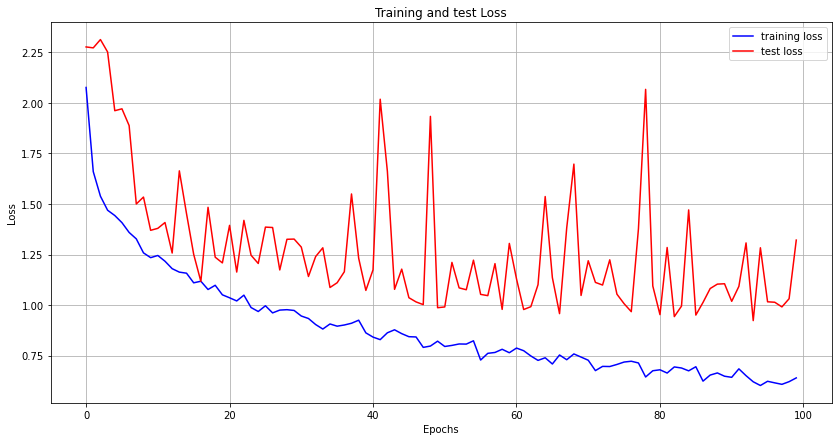

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and test Loss')
plt.plot(history5.history['loss'], color='blue', label='training loss')
plt.plot(history5.history['val_loss'], color='red', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

Plot the accuracy of training and test sets

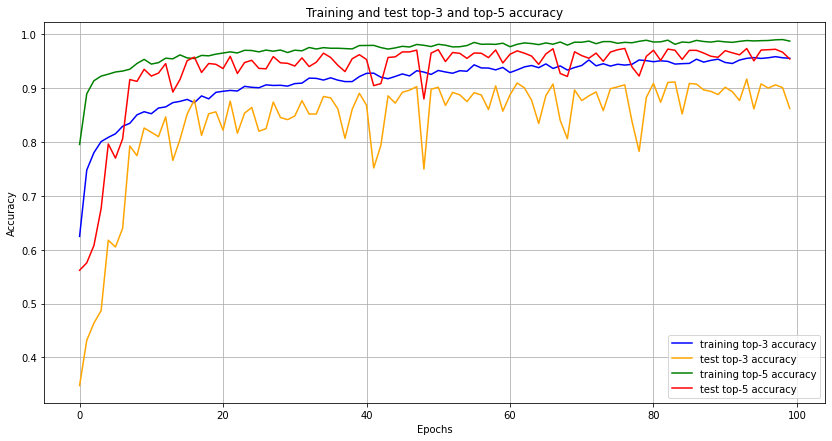

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Training and test top-3 and top-5 accuracy')
plt.plot(history5.history['top3_accuracy'], color='blue', label='training top-3 accuracy')
plt.plot(history5.history['val_top3_accuracy'], color='orange', label='test top-3 accuracy')
plt.plot(history5.history['top5_accuracy'], color='green', label='training top-5 accuracy')
plt.plot(history5.history['val_top5_accuracy'], color='red', label='test top-5 accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
model5.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.3214 - accuracy: 0.6054 - top3_accuracy: 0.8621 - top5_accuracy: 0.9540


[1.3213633298873901, 0.605400025844574, 0.8621000051498413, 0.9539999961853027]

We get more accurate result than P1.1

# **P2-recurrent neural networks**

## **P2.1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the txt file
import os
data = open("/content/drive/My Drive/book.txt", "r").read()

In [ ]:
vocab = sorted(set(data))
# Print the data size and the vocabulary size
data_size = len(data)
vocab_size = len(vocab)
print(f"Data size:{data_size} and Vocabulary size:{vocab_size}.")

Data size:164047 and Vocabulary size:90.


In [ ]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)
def split_input_target(sequence):
  input_text = sequence[:-1]
  target_text = sequence[1:]
  return input_text, target_text

In [ ]:
tokens=50 # set the number of subsequences
chars = tf.strings.unicode_split(data, input_encoding='UTF-8')
ids_from_chars = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=list(vocab), mask_token=None)
ids = ids_from_chars(chars)
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)
ids_dataset = tf.data.Dataset.from_tensor_slices(ids)
sequences = ids_dataset.batch(tokens+1, drop_remainder=True)
book_data = sequences.map(split_input_target)

In [ ]:
for input_example, target_example in book_data.take(3):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'\xef\xbb\xbfThe Project Gutenberg eBook of Alice\xe2\x80\x99s Adventures'
Target: b'The Project Gutenberg eBook of Alice\xe2\x80\x99s Adventures '
Input : b'in Wonderland, by Lewis Carroll\n\nThis eBook is for'
Target: b'n Wonderland, by Lewis Carroll\n\nThis eBook is for '
Input : b'the use of anyone anywhere in the United States an'
Target: b'he use of anyone anywhere in the United States and'


## **P2.2**

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocabulary_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = Embedding(vocabulary_size, embedding_dim)
    self.lstm = LSTM(rnn_units, return_sequences=True, return_state=True,
                     kernel_initializer='glorot_uniform', stateful=True)
    self.dense = Dense(vocabulary_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.lstm.get_initial_state(x)
    x, states0, states1 = self.lstm(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states0, states1
    else:
      return x

In [ ]:
batch_size = 64
buffer_size = 10000
book_data = (
    book_data
    .shuffle(buffer_size)
    .batch(batch_size, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
Model1 = MyModel(
    vocabulary_size = len(ids_from_chars.get_vocabulary()),
    embedding_dim = 256,
    rnn_units = 1024)

In [ ]:
for input_example_batch, target_example_batch in book_data.take(3):
    example_batch_predictions = Model1(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 50, 91) # (batch_size, sequence_length, vocab_size)
(64, 50, 91) # (batch_size, sequence_length, vocab_size)
(64, 50, 91) # (batch_size, sequence_length, vocab_size)


In [ ]:
## show the model summary
Model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  23296     
                                                                 
 lstm (LSTM)                 multiple                  5246976   
                                                                 
 dense (Dense)               multiple                  93275     
                                                                 
Total params: 5,363,547
Trainable params: 5,363,547
Non-trainable params: 0
_________________________________________________________________


## **P2.3**

In [ ]:
## Model compile
## Because the model returns logits, we need to set the from_logits=True.
Model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.optimizers.Adam(learning_rate=0.01))

In [ ]:
loss = []
for i in range(50):
    Model1.reset_states()
    History1 = Model1.fit(book_data, batch_size=64, epochs=1, shuffle=True)
    loss.append(History1.history['loss'])

50/50 [==============================] - 4s 83ms/step - loss: 0.8703


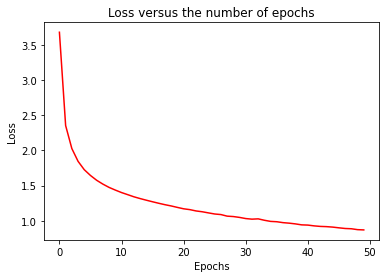

In [ ]:
plt.figure()
plt.title('Loss versus the number of epochs')
plt.plot(loss, color='red')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.show()

When the number of epochs increases, the loss decreases.